<center>
    
## Project Type: Machine Learning
### Курсовой проект по курсу GeekBrains: Библиотеки Python для Data Science: продолжение

### Project Number: 2
# Project Title: Кредитный скоринг 

---

<center>
    
# **STAGE 1. PROBLEM DEFINITION**
    




### Project Objectives

---

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета

### Success criteria

---

#### Наименование файлов с данными

- course_project_train.csv - обучающий датасет
- course_project_test.csv - тестовый датасет

#### Целевая переменная

Credit Default - факт невыполнения кредитных обязательств

#### Метрика качества

F1-score (sklearn.metrics.f1_score)

#### Требования к решению

_Целевая метрика_

- F1 > 0.5
- Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

### Task type

---

Задача кредитного скоринга относится к классу задач классфикикации. 

<center>
    
# **STAGE 2. DATA WRANGLING**



### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Import Data

---

In [2]:
data_path = 'D:/Data_Science_Project/Курс GB - Библиотеки Python для Data Science продолжение/course_project_train.csv'

<center>
    
# Section 1.  Data Understanding

### _Collect initial data_

---

In [3]:
# Загрузим тренировочный набор даннх для первичного визуального анализа 
train_data = pd.read_csv(data_path)
train_data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
train_data.tail().T

,7495,7496,7497,7498,7499
Home Ownership,Rent,Home Mortgage,Rent,Home Mortgage,Rent
Annual Income,402192,1.53398e+06,1.87891e+06,NaN,NaN
Years in current job,< 1 year,1 year,6 years,NaN,4 years
Tax Liens,0,0,0,0,0
Number of Open Accounts,3,10,12,21,8
Years of Credit History,8.5,26.5,32.1,26.5,9.4
Maximum Open Credit,107866,686312,1.77892e+06,1.14125e+06,480832
Number of Credit Problems,0,0,0,0,0
Months since last delinquent,NaN,43,NaN,NaN,NaN
Bankruptcies,0,0,0,0,0


Первичный визуальный анализ показывает, что в тренировочном наборе имеются ряд категориальных перменных, рад колличественных перменных, пропущенные значения, нулевые значения, названия переменных содержат пробелы. 

Проведем дальнейшие начальные исследования набора данных. 

In [5]:
# Форма исходного набора данных
print("Форма исходного набора данных:\n{}".format(train_data.shape))

Форма исходного набора данных:
(7500, 17)


In [6]:
# Список столбцов
train_data.columns.tolist()

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [7]:
# Анализ типов данных
train_data.dtypes 

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [8]:
# Общая информация о наборе данных 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Выводы

- Набор имеет 17 переменных и 7500 наблюдений.
- В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500. 
- Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
- Переменная Credit Default имеет тип данных int64.
- Оставшиеся 12 переменных имеют тип данныз float64.

### _Describe data_

---

#### Описание датасета

1. Home Ownership - домовладение
1. Annual Income - годовой доход
1. Years in current job - количество лет на текущем месте работы
1. Tax Liens - налоговые обременения
1. Number of Open Accounts - количество открытых счетов
1. Years of Credit History - количество лет кредитной истории
1. Maximum Open Credit - наибольший открытый кредит
1. Number of Credit Problems - количество проблем с кредитом
1. Months since last delinquent - количество месяцев с последней просрочки платежа
1. Bankruptcies - банкротства
1. Purpose - цель кредита
1. Term - срок кредита
1. Current Loan Amount - текущая сумма кредита
1. Current Credit Balance - текущий кредитный баланс
1. Monthly Debt - ежемесячный долг
1. Credit Score -  кредитная оценка 
1. Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

#### Описание типов переменных

- Home Ownership - _категориальная перменная_ 
- Annual Income - **количественная переменная** 
- Years in current job - _категориальная перменная_
- Tax Liens - _категориальная перменная_
- Number of Open Accounts - **количественная переменная**
- Years of Credit History -  **количественная переменная**
- Maximum Open Credit - **количественная переменная**
- Number of Credit Problems - **количественная переменная** или _категориальная перменная_ - необходим дальнейший анализ 
- Months since last delinquent - **количественная переменная**
- Bankruptcies - банкротства - **количественная переменная** или _категориальная перменная_ - необходим дальнейший анализ 
- Purpose -  _категориальная перменная_
- Term - _категориальная перменная_
- Current Loan Amount - **количественная переменная**
- Current Credit Balance - **количественная переменная**
- Monthly Debt - **количественная переменная**
- Credit Score - **количественная переменная**
- Credit Default - _категориальная перменная_

**Итого**
- Категориальные переменные
    1. Home Ownership
    1. Years in current job
    1. Tax Liens
    1. Purpose
    1. Term
    1. Credit Default
- Количественные переменные
    1. Annual Income
    1. Number of Open Accounts
    1. Years of Credit History
    1. Maximum Open Credit
    1. Months since last delinquent
    1. Current Loan Amount
    1. Current Credit Balance
    1. Monthly Debt
    1. Credit Score
- Требуются дополнительные исследования 
    1. Number of Credit Problems
    1. Bankruptcies

### _Verify data quality_

---

In [9]:
# Функция коплексной оценки качества данных 
def verify_data_quality (evaluated_dataset):
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes))
    # Проверка наличия значений NaN
    print("Пропущенные значения:\n{}\n".format(evaluated_dataset.isnull().sum().sum()))
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()))
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()))
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape))
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index))

In [10]:
# Оценка качетва данных
verify_data_quality(train_data)

Типы данных:
Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

Пропущенные значения:
7580

Количество значений, отличных от NaN:
119920

Дублирующих строк:
0

Форма нарбора данных:
(7500, 17)

Тип индекса набора данных:
RangeIndex(start=0, stop=7500, step=1)



### _Conclusions_

---

Тренировочный набор данных имеет:

- 6 катеориальных переменных
- 9 колличественных переменных 
- 2 переменные которые можно оценить как категориальные так и числовые, необходим дальнейший анализ
- Набор имеет 17 переменных и 7500 наблюдений.
- В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500. 
- Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
- Переменная Credit Default имеет тип данных int64.
- Оставшиеся 12 переменных имеют тип данныз float64.
-  7580 пропущенных значений 
- 119920 отличных от NaN
- Дублирующих строк нет 
- Индекс типа RangeIndex, непрерывный с шагом 1 

<center>

# Section 2. Data Preparation

## **Clean data**

---
***

### _Renaming_

---

Имена переменных начинаются с большой буквы и содержат пробелы, для корректной работы  переименуем перменные к стандартной форме. 

In [11]:
# Приведение имен переменных к принятой для анализа форме 
train_data.columns = [i.replace(' ', '_').lower() for i in train_data.columns]

In [12]:
# Проверка результата переиминования
train_data.columns.tolist()

['home_ownership',
 'annual_income',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'number_of_credit_problems',
 'months_since_last_delinquent',
 'bankruptcies',
 'purpose',
 'term',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'credit_default']

### _Data type conversions_

---

Перед приведением типов данных согласно типу переменной дополнительно проанлизируем перменные bankruptcies и number_of_credit_problems  с целью уточнения типа переменной. 

**number_of_credit_problems**

In [13]:
# Анализ уникальных значений 
train_data['number_of_credit_problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [14]:
# Колличество значений 
train_data['number_of_credit_problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: number_of_credit_problems, dtype: int64

Фактически переменная number_of_credit_problems является категориальной порядковой переменной принимающей значения от 0 до 7.

 **bankruptcies** 

In [15]:
# Анализ уникальных значений 
train_data['bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [16]:
# Колличество значений 
train_data['bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64

Переменная bankruptcies так же является категориальной порядковой переменной принимающей значения от 0 до 4.

После уточнения типов премеменных получаем следующий результат.

**Категориальные переменные**

1. home_ownership
1. years_in_current_job
1. tax_liens
1. number_of_credit_problems
1. bankruptcies
1. purpose
1. term
1. credit_default


**Колличественные переменные**

1. annual_income
1. number_of_open_accounts
1. years_of_credit_history
1. maximum_open_credit
1. months_since_last_delinquent
1. current_loan_amount
1. current_credit_balance
1. monthly_debt
1. credit_score


#### Исследуем категориальные переменные

In [17]:
# Создадим отлельный набор для категориальных пепеменных
train_data_cat = train_data[['home_ownership',
                             'years_in_current_job',
                             'tax_liens',
                             'number_of_credit_problems',
                             'bankruptcies',
                             'purpose',
                             'term',
                             'credit_default']]

In [18]:
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_ownership             7500 non-null   object 
 1   years_in_current_job       7129 non-null   object 
 2   tax_liens                  7500 non-null   float64
 3   number_of_credit_problems  7500 non-null   float64
 4   bankruptcies               7486 non-null   float64
 5   purpose                    7500 non-null   object 
 6   term                       7500 non-null   object 
 7   credit_default             7500 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 468.9+ KB


In [19]:
train_data_cat.head()

,home_ownership,years_in_current_job,tax_liens,number_of_credit_problems,bankruptcies,purpose,term,credit_default
0,Own Home,NaN,0.0,1.0,1.0,debt consolidation,Short Term,0
1,Own Home,10+ years,0.0,0.0,0.0,debt consolidation,Long Term,1
2,Home Mortgage,8 years,0.0,0.0,0.0,debt consolidation,Short Term,0
3,Own Home,6 years,0.0,1.0,1.0,debt consolidation,Short Term,0
4,Rent,8 years,0.0,1.0,0.0,debt consolidation,Short Term,0


- Переменные home_ownership, purpose, term имеют словестное выражение. 
- Переменная years_in_current_job имеет смешанное словестно \ численное представление. 
- Переменные tax_liens, number_of_credit_problems, bankruptcies, credit_default имеют численное представление. 

In [20]:
# Приведем переменные к типу данных category
train_data_cat = train_data_cat.astype('category')

In [21]:
# Оценим получившийся результат
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   home_ownership             7500 non-null   category
 1   years_in_current_job       7129 non-null   category
 2   tax_liens                  7500 non-null   category
 3   number_of_credit_problems  7500 non-null   category
 4   bankruptcies               7486 non-null   category
 5   purpose                    7500 non-null   category
 6   term                       7500 non-null   category
 7   credit_default             7500 non-null   category
dtypes: category(8)
memory usage: 61.2 KB


#### Исследуем колличественные переменные

In [22]:
# Создадим отлельный набор для колличественных пепеменных
train_data_num = train_data[['annual_income',
                             'number_of_open_accounts',
                             'years_of_credit_history',
                             'maximum_open_credit',
                             'months_since_last_delinquent',
                             'current_loan_amount',
                             'current_credit_balance',
                             'monthly_debt',
                             'credit_score']]

In [23]:
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   annual_income                 5943 non-null   float64
 1   number_of_open_accounts       7500 non-null   float64
 2   years_of_credit_history       7500 non-null   float64
 3   maximum_open_credit           7500 non-null   float64
 4   months_since_last_delinquent  3419 non-null   float64
 5   current_loan_amount           7500 non-null   float64
 6   current_credit_balance        7500 non-null   float64
 7   monthly_debt                  7500 non-null   float64
 8   credit_score                  5943 non-null   float64
dtypes: float64(9)
memory usage: 527.5 KB


In [24]:
train_data_num.head()

,annual_income,number_of_open_accounts,years_of_credit_history,maximum_open_credit,months_since_last_delinquent,current_loan_amount,current_credit_balance,monthly_debt,credit_score
0,482087.0,11.0,26.3,685960.0,NaN,99999999.0,47386.0,7914.0,749.0
1,1025487.0,15.0,15.3,1181730.0,NaN,264968.0,394972.0,18373.0,737.0
2,751412.0,11.0,35.0,1182434.0,NaN,99999999.0,308389.0,13651.0,742.0
3,805068.0,8.0,22.5,147400.0,NaN,121396.0,95855.0,11338.0,694.0
4,776264.0,13.0,13.6,385836.0,NaN,125840.0,93309.0,7180.0,719.0


In [25]:
train_data_num.tail()

,annual_income,number_of_open_accounts,years_of_credit_history,maximum_open_credit,months_since_last_delinquent,current_loan_amount,current_credit_balance,monthly_debt,credit_score
7495,402192.0,3.0,8.5,107866.0,NaN,129360.0,73492.0,1900.0,697.0
7496,1533984.0,10.0,26.5,686312.0,43.0,444048.0,456399.0,12783.0,7410.0
7497,1878910.0,12.0,32.1,1778920.0,NaN,99999999.0,477812.0,12479.0,748.0
7498,NaN,21.0,26.5,1141250.0,NaN,615274.0,476064.0,37118.0,NaN
7499,NaN,8.0,9.4,480832.0,NaN,26928.0,288192.0,9061.0,NaN


Колличественные переменные переменные имеют идентичный тип данных float64 и в дополнительных манипуляциях не нуждаются. 

### _Categorical encoding_

---

### _Sorting, reordering, reindexing_

---

Переупорядочем тренировачные данные следующим образом:

1. home_ownership
1. purpose
1. term
1. years_in_current_job 
1. tax_liens
1. number_of_credit_problems
1. bankruptcies
1. credit_default 
1. annual_income
1. maximum_open_credit
1. current_loan_amount
1. current_credit_balance
1. monthly_debt
1. credit_score
1. number_of_open_accounts
1. years_of_credit_history
1. months_since_last_delinquent

In [26]:
# Объеденим train_data_cat и train_data_num обратно в общий набор данных 
train_data_reord = pd.concat([train_data_cat, train_data_num], axis=1)

In [27]:
# Переупорядочим переменные 
train_data_reord = train_data_reord[['home_ownership',
                                    'purpose',
                                    'term',
                                    'years_in_current_job',
                                    'tax_liens',
                                    'number_of_credit_problems',
                                    'bankruptcies',
                                    'credit_default',
                                    'annual_income',
                                    'maximum_open_credit',
                                    'current_loan_amount',
                                    'current_credit_balance',
                                    'monthly_debt',
                                    'credit_score',
                                    'number_of_open_accounts',
                                    'years_of_credit_history',
                                    'months_since_last_delinquent']]

In [28]:
# Оценим полученный результат
train_data_reord.head().T

,0,1,2,3,4
home_ownership,Own Home,Own Home,Home Mortgage,Own Home,Rent
purpose,debt consolidation,debt consolidation,debt consolidation,debt consolidation,debt consolidation
term,Short Term,Long Term,Short Term,Short Term,Short Term
years_in_current_job,NaN,10+ years,8 years,6 years,8 years
tax_liens,0,0,0,0,0
number_of_credit_problems,1,0,0,1,1
bankruptcies,1,0,0,1,0
credit_default,0,1,0,0,0
annual_income,482087,1.02549e+06,751412,805068,776264
maximum_open_credit,685960,1.18173e+06,1.18243e+06,147400,385836


### _Addressing missing or invalid data_

---

In [29]:
# Оценим наличие пропущенных значений. 
train_data_reord.isna().sum()

home_ownership                     0
purpose                            0
term                               0
years_in_current_job             371
tax_liens                          0
number_of_credit_problems          0
bankruptcies                      14
credit_default                     0
annual_income                   1557
maximum_open_credit                0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                    1557
number_of_open_accounts            0
years_of_credit_history            0
months_since_last_delinquent    4081
dtype: int64

Оценка показывает, что следующие перменные имеют пропущенные значения: 

- years_in_current_job  
- bankruptcies
- annual_income
- credit_score
- months_since_last_delinquent

Исследуем каждую переменную более детально для того чтобы определить наилучшую стратегию заполнения пропусков. 

In [30]:
# Оценка пропусков категориальных данных
def estimation_missing_cat_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()))
    # Уникальные значения 
    print("Уникальные значения:\n{}\n".format(data.sort_values().unique().tolist()))
    # Суммарное колличество каждого значения 
    print("Суммарное колличество каждого значения:\n{}\n".format(data.value_counts()))
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe()))

**years_in_current_job**

In [31]:
# Оценка пропусков данных
estimation_missing_cat_data(train_data_reord['years_in_current_job'])

Колличество пропусков:
371

Уникальные значения:
['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', nan]

Суммарное колличество каждого значения:
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: years_in_current_job, dtype: int64

Описательные статистики:
count          7129
unique           11
top       10+ years
freq           2332
Name: years_in_current_job, dtype: object



Переменная years_in_current_job - категориальная и имеет 371 пропущеннное значение.  
Самыми распрастраннеными стратегиями заполнения пропущенных категриальных значений являются заполнение константой или самым частым значением.  Второй подход имеет минус т.к. может привести к смешению данных.  


Заменим пропущенные значения на константу Unknown. 

In [32]:
# Замена значений на Unknown
train_data_reord['years_in_current_job'] = train_data_reord['years_in_current_job'].cat.add_categories(['Unknown'])
train_data_reord['years_in_current_job'] = train_data_reord['years_in_current_job'].fillna('Unknown')

In [33]:
# Проверим результат. 
train_data_reord['years_in_current_job'].isna().sum()

0

**bankruptcies**  

In [34]:
# Оценка пропусков данных
estimation_missing_cat_data(train_data_reord['bankruptcies'])

Колличество пропусков:
14

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, 4.0, nan]

Суммарное колличество каждого значения:
0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64

Описательные статистики:
count     7486.0
unique       5.0
top          0.0
freq      6660.0
Name: bankruptcies, dtype: float64



Переменная bankruptcies имеет 14 пропусков, при этом самое часто встречающиеся значение 0. 
Заменим пропущенные значения 0. 

In [35]:
train_data_reord['bankruptcies'] = train_data_reord['bankruptcies'].fillna(0)

In [36]:
# Проверим результат. 
train_data_reord['bankruptcies'].isna().sum()

0

**annual_income**

In [37]:
# Оценка пропусков колличественных данных
def estimation_missing_num_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()))
    # Колличество значений  
    print("Колличество значений:\n{}\n".format(data.count()))
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe().round(2)))
    # Значения    
    print("Значения:\n{}\n".format(data.values))
    # Оценка плотности распределения
    data.plot.hist(bins=200, legend = True, density=True, grid = True, figsize = (20, 5), alpha = 0.5, title ='Оценка плотности распределения')
    data.plot(kind='kde', grid = True, figsize = (20, 5), style=['g', '#FF0000'])

Колличество пропусков:
1557

Колличество значений:
5943

Описательные статистики:
count        5943.00
mean      1366391.72
std        845339.20
min        164597.00
25%        844341.00
50%       1168386.00
75%       1640137.00
max      10149344.00
Name: annual_income, dtype: float64

Значения:
[ 482087. 1025487.  751412. ... 1878910.      nan      nan]



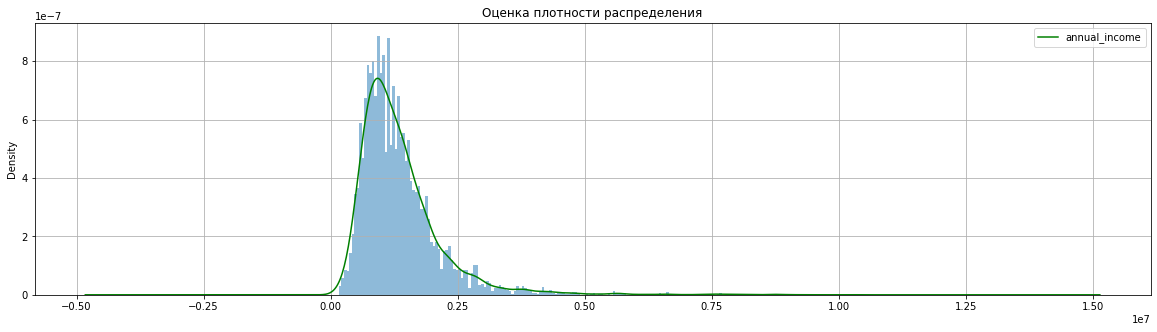

In [38]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['annual_income'])

In [39]:
# Заполним пропуски средним значением 
train_data_reord['annual_income'] = train_data_reord['annual_income'].fillna(train_data_reord['annual_income'].mean())

Колличество пропусков:
0

Колличество значений:
7500

Описательные статистики:
count        7500.00
mean      1366391.72
std        752481.20
min        164597.00
25%        931133.00
50%       1366391.72
75%       1499974.00
max      10149344.00
Name: annual_income, dtype: float64

Значения:
[ 482087.       1025487.        751412.       ... 1878910.
 1366391.720175 1366391.720175]



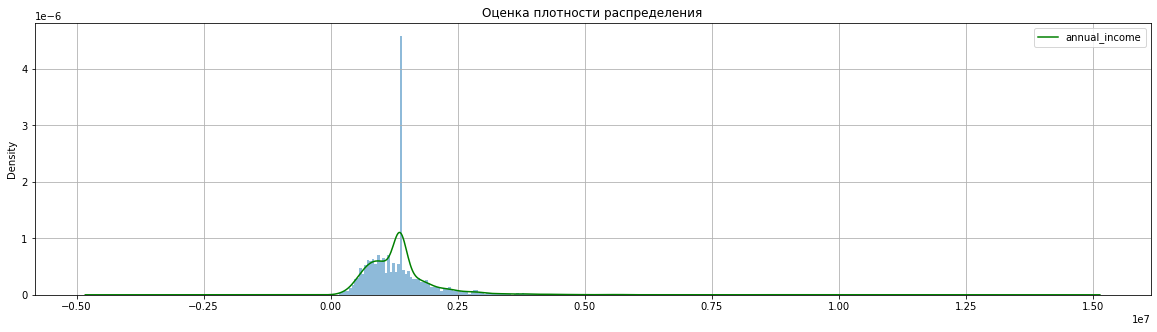

In [40]:
# Проверим результат. 
estimation_missing_num_data(train_data_reord['annual_income'])

**credit_score**

Колличество пропусков:
1557

Колличество значений:
5943

Описательные статистики:
count    5943.00
mean     1151.09
std      1604.45
min       585.00
25%       711.00
50%       731.00
75%       743.00
max      7510.00
Name: credit_score, dtype: float64

Значения:
[749. 737. 742. ... 748.  nan  nan]



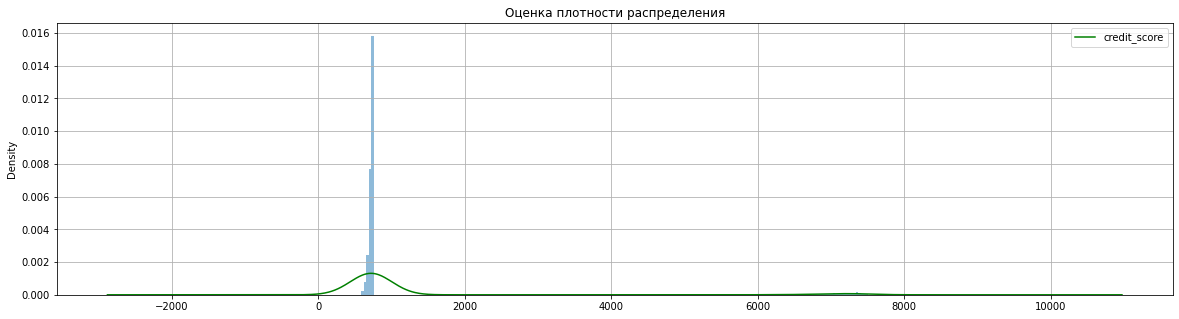

In [41]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['credit_score'])

In [42]:
# Заполним пропуски медианным значением 
train_data_reord['credit_score'] = train_data_reord['credit_score'].fillna(train_data_reord['credit_score'].median())

Колличество пропусков:
0

Колличество значений:
7500

Описательные статистики:
count    7500.00
mean     1063.88
std      1438.34
min       585.00
25%       718.00
50%       731.00
75%       740.00
max      7510.00
Name: credit_score, dtype: float64

Значения:
[749. 737. 742. ... 748. 731. 731.]



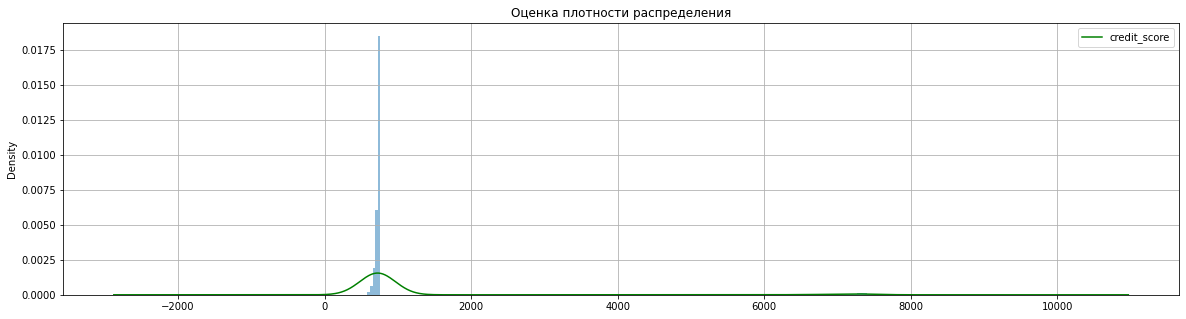

In [43]:
# Проверим результат.
estimation_missing_num_data(train_data_reord['credit_score'])

**months_since_last_delinquent**

Колличество пропусков:
4081

Колличество значений:
3419

Описательные статистики:
count    3419.00
mean       34.69
std        21.69
min         0.00
25%        16.00
50%        32.00
75%        50.00
max       118.00
Name: months_since_last_delinquent, dtype: float64

Значения:
[nan nan nan ... nan nan nan]



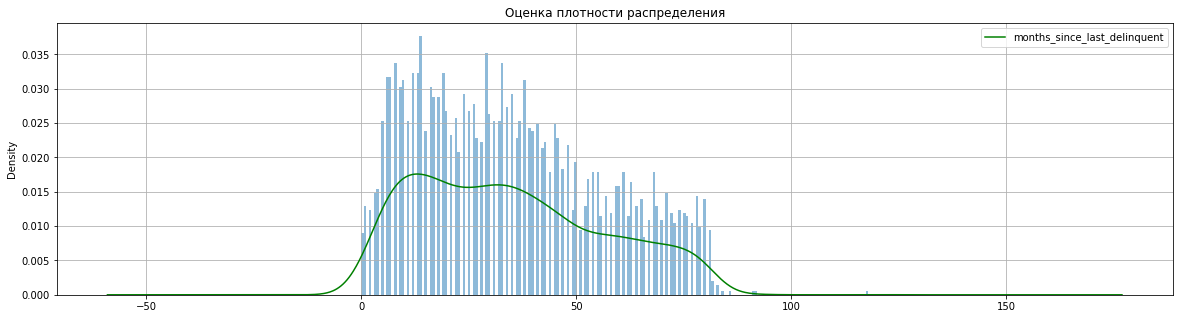

In [44]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['months_since_last_delinquent'])

In [45]:
# Заполним пропуски интерполяцией пропущенных значений 
train_data_reord['months_since_last_delinquent'] = train_data_reord['months_since_last_delinquent'].fillna(train_data_reord['months_since_last_delinquent'].interpolate(method="nearest"))

Колличество пропусков:
9

Колличество значений:
7491

Описательные статистики:
count    7491.00
mean       34.30
std        21.64
min         0.00
25%        16.00
50%        32.00
75%        50.00
max       118.00
Name: months_since_last_delinquent, dtype: float64

Значения:
[nan nan nan ... nan nan nan]



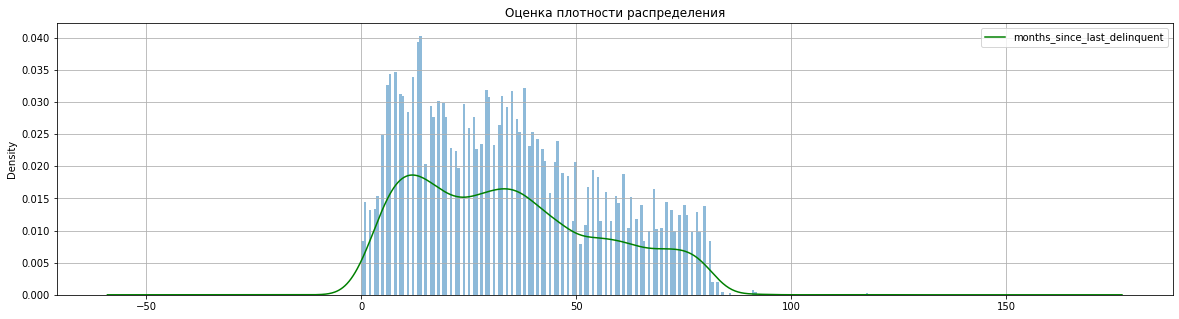

In [46]:
# Проверим результат.
estimation_missing_num_data(train_data_reord['months_since_last_delinquent'])

In [47]:
# Оценим наличие пропущенных значений после заполнения во всем наборе данных. 
train_data_reord.isna().sum()

home_ownership                  0
purpose                         0
term                            0
years_in_current_job            0
tax_liens                       0
number_of_credit_problems       0
bankruptcies                    0
credit_default                  0
annual_income                   0
maximum_open_credit             0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
number_of_open_accounts         0
years_of_credit_history         0
months_since_last_delinquent    9
dtype: int64

### _Deduplicating data_

---

Оценим наличие дубллирующих значений. 

In [48]:
print("Колличество дублирующих значений:\n{}".format(train_data_reord.duplicated().sum()))

Колличество дублирующих значений:
0


<center>

# Section 3.Conclusions

Этап переформатирования данных состоял из двух основных разделов, каждый из которых имеет серию подразделов. Сведем полученные результаты и выводы в единое заключение. 

1. **Section 1. Data Understanding** 
    1. **Collect initial data**
        1. Набор имеет 17 переменных и 7500 наблюдений.
        1. В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500.
        1. Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
        1. Переменная Credit Default имеет тип данных int64.
        1. Оставшиеся 12 переменных имеют тип данныз float64
    1. **Describe data**
        - *Описание датасета*
        1. Home Ownership - домовладение
        1. Annual Income - годовой доход
        1. Years in current job - количество лет на текущем месте работы
        1. Tax Liens - налоговые обременения
        1. Number of Open Accounts - количество открытых счетов
        1. Years of Credit History - количество лет кредитной истории
        1. Maximum Open Credit - наибольший открытый кредит
        1. Number of Credit Problems - количество проблем с кредитом
        1. Months since last delinquent - количество месяцев с последней просрочки платежа
        1. Bankruptcies - банкротства
        1. Purpose - цель кредита
        1. Term - срок кредита
        1. Current Loan Amount - текущая сумма кредита
        1. Current Credit Balance - текущий кредитный баланс
        1. Monthly Debt - ежемесячный долг
        1. Credit Score - кредитная оценка
        1. Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)
        - *Тип переменных* 
        - Категориальные переменные
            - Home Ownership
            - Years in current job
            - Tax Liens
            - Purpose
            - Term
            - Credit Default
        - Количественные переменные
            - Annual Income
            - Number of Open Accounts
            - Years of Credit History
            - Maximum Open Credit
            - Months since last delinquent
            - Current Loan Amount
            - Current Credit Balance
            - Monthly Debt
            - Credit Score
        - Требуются дополнительные исследования
            - Number of Credit Problems
            - Bankruptcies
    1. **Verify data quality**
        - 6 катеориальных переменных
        - 9 колличественных переменных 
        - 2 переменные которые можно оценить как категориальные так и числовые, необходим дальнейший анализ
        - Набор имеет 17 переменных и 7500 наблюдений.
        - В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500. 
        - Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
        - Переменная Credit Default имеет тип данных int64.
        - Оставшиеся 12 переменных имеют тип данныз float64.
        - 7580 пропущенных значений 
        - 119920 отличных от NaN
        - Дублирующих строк нет 
        - Индекс типа RangeIndex, непрерывный с шагом 1     

1. **Section 2. Data Preparation**
    1. **Renaming**
        - Имена переменых переименнованны к стандартному виду: с маленькой буквы и без пробелов 
    1. **Data type conversions**
        - Уточнены типы переменных ankruptcies и number_of_credit_problems. Они являются категориальными     
        - Категориальные переменные конвертированы в тип данных category 
        - Тип данных колличественных переменных оставлен без изменения float64
    1. **Sorting, reordering, reindexing**
        - Набор данных переупорядочен следующим образом: 
            1. home_ownership
            1. purpose
            1. term
            1. years_in_current_job 
            1. tax_liens
            1. number_of_credit_problems
            1. bankruptcies
            1. credit_default 
            1. annual_income
            1. maximum_open_credit
            1. current_loan_amount
            1. current_credit_balance
            1. monthly_debt
            1. credit_score
            1. number_of_open_accounts
            1. years_of_credit_history
            1. months_since_last_delinquent
    1. **Addressing missing or invalid data**
        - Установленно, что следующие переменные имеют пропущенные значения 
            - years_in_current_job  
            - bankruptcies
            - annual_income
            - credit_score
            - months_since_last_delinquent
        - В каждом отдельном случае пропущенные значения заполнены соответсвующим методом на основании детального исследования переменной 
    1. **Deduplicating data**
        - Дублирующих значений нет. 

<center>
    
# **STAGE 3. EXPLORATORY DATA ANALYSIS**

<center>

# Section 1. Research

### _Descriptive Statistics_

---

In [49]:
# Переименуюем название набора данных для анализа
train_data_eda = train_data_reord

Раздели исходный подготовленный набора данных train_data_eda на два поднабора по типам признаков для детального анализа: 
- Категориальный набор признаков: train_data_eda_cat
- Колличественный набор признаков: train_data_eda_num

In [50]:
# Выделим категориальные признаки в отдельный набор данных
train_data_eda_cat = train_data_eda[['home_ownership',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_credit_problems',
                                     'bankruptcies',
                                     'purpose',
                                     'term',
                                     'credit_default']]

In [51]:
# Выделим колличественные признаки в отдельный набор данных
train_data_eda_num = train_data_eda[['annual_income',
                                     'number_of_open_accounts',
                                     'years_of_credit_history',
                                     'maximum_open_credit',
                                     'months_since_last_delinquent',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score']]

Описательные статистики для колличественных переменных

In [52]:
# Изменение формата отаброжения чисел.
pd.options.display.float_format = '{:.2f}'.format

In [53]:
# Сводные описательные статистики
train_data_eda_num.describe()

,annual_income,number_of_open_accounts,years_of_credit_history,maximum_open_credit,months_since_last_delinquent,current_loan_amount,current_credit_balance,monthly_debt,credit_score
count,7500.00,7500.00,7500.00,7500.00,7491.00,7500.00,7500.00,7500.00,7500.00
mean,1366391.72,11.13,18.32,945153.73,34.30,11873177.45,289833.24,18314.45,1063.88
std,752481.20,4.91,7.04,16026216.67,21.64,31926122.97,317871.38,11926.76,1438.34
min,164597.00,2.00,4.00,0.00,0.00,11242.00,0.00,0.00,585.00
25%,931133.00,8.00,13.50,279229.50,16.00,180169.00,114256.50,10067.50,718.00
50%,1366391.72,10.00,17.00,478159.00,32.00,309573.00,209323.00,16076.50,731.00
75%,1499974.00,14.00,21.80,793501.50,50.00,519882.00,360406.25,23818.00,740.00
max,10149344.00,43.00,57.70,1304726170.00,118.00,99999999.00,6506797.00,136679.00,7510.00


In [54]:
# Смещение 
train_data_eda_num.skew()

annual_income                   3.40
number_of_open_accounts         1.12
years_of_credit_history         1.05
maximum_open_credit            74.19
months_since_last_delinquent    0.45
current_loan_amount             2.40
current_credit_balance          5.20
monthly_debt                    1.68
credit_score                    3.99
dtype: float64

In [55]:
# Эксцесс
train_data_eda_num.kurt()

annual_income                    21.91
number_of_open_accounts           2.24
years_of_credit_history           1.60
maximum_open_credit            5894.46
months_since_last_delinquent     -0.79
current_loan_amount               3.75
current_credit_balance           52.95
monthly_debt                      5.83
credit_score                     13.97
dtype: float64

Описательные статистики для категориальных переменных

In [56]:
# Сводные описательные статистики
train_data_eda_cat.describe()

,home_ownership,years_in_current_job,tax_liens,number_of_credit_problems,bankruptcies,purpose,term,credit_default
count,7500,7500,7500.00,7500.00,7500.00,7500,7500,7500
unique,4,12,8.00,8.00,5.00,15,2,2
top,Home Mortgage,10+ years,0.00,0.00,0.00,debt consolidation,Short Term,0
freq,3637,2332,7366.00,6469.00,6674.00,5944,5556,5387


### _Distribution of data_

---

#### Исследуем распределение колличественных переменных

In [59]:
# Список переменных
train_data_eda_num.columns.to_list()

['annual_income',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'months_since_last_delinquent',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score']

In [242]:
def distribution_of_quantitative_variables(data_for_eda):
    
    fig, ax = plt.subplots(ncols=3, figsize=(25, 5))
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Распределение переменной", fontsize=18)
    
    sns.histplot(data = data_for_eda, bins = 80, stat = 'density', kde = True, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.scatterplot(data = data_for_eda, ax=ax[2])
    
    print("Описательные статистики:\n{}".format(data_for_eda.describe().round(2)))

##### annual_income

In [245]:
annual_income = train_data_eda_num['annual_income']

Описательные статистики:
count       7500.00
mean     1366391.72
std       752481.20
min       164597.00
25%       931133.00
50%      1366391.72
75%      1499974.00
max     10149344.00
Name: annual_income, dtype: float64


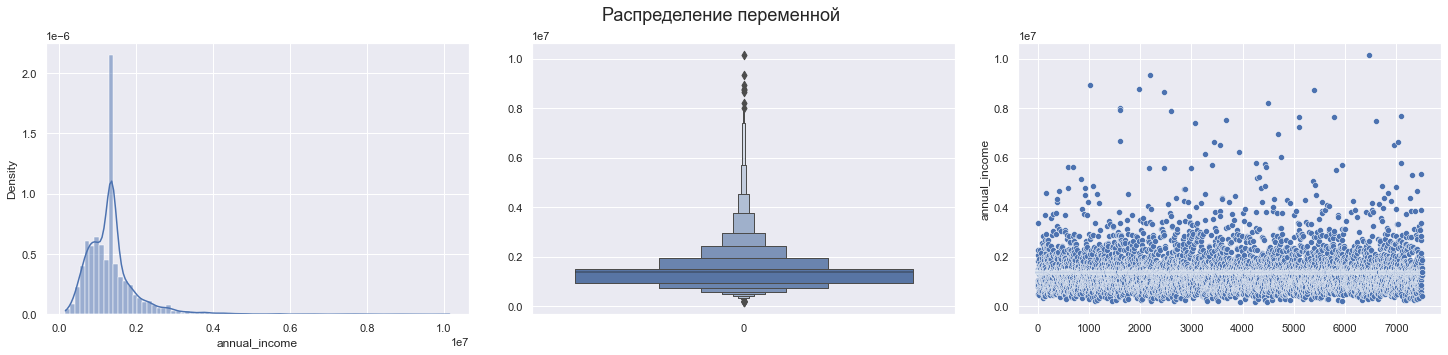

In [246]:
distribution_of_quantitative_variables(annual_income)

##### number_of_open_accounts

In [247]:
number_of_open_accounts = train_data_eda_num['number_of_open_accounts']

Описательные статистики:
count   7500.00
mean      11.13
std        4.91
min        2.00
25%        8.00
50%       10.00
75%       14.00
max       43.00
Name: number_of_open_accounts, dtype: float64


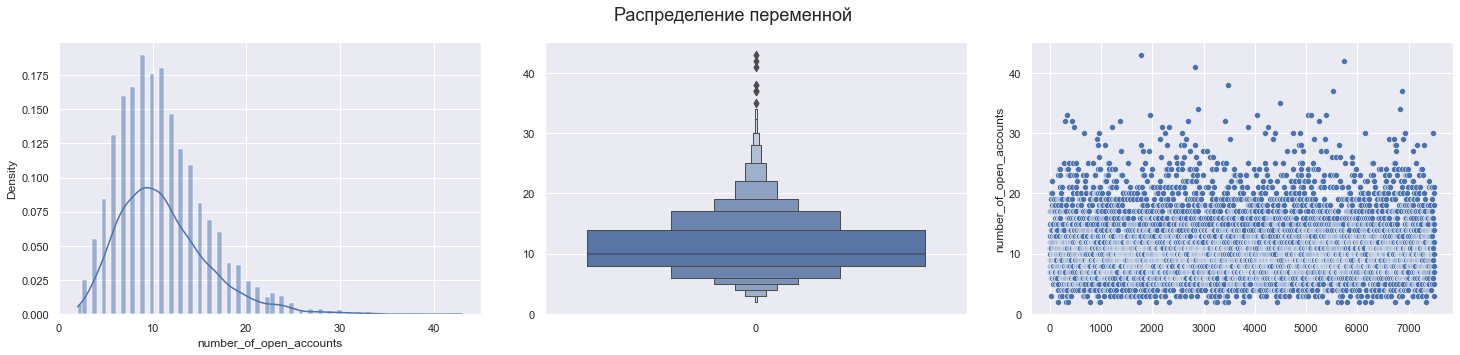

In [248]:
distribution_of_quantitative_variables(number_of_open_accounts)

##### years_of_credit_history

In [249]:
years_of_credit_history = train_data_eda_num['years_of_credit_history']

Описательные статистики:
count   7500.00
mean      18.32
std        7.04
min        4.00
25%       13.50
50%       17.00
75%       21.80
max       57.70
Name: years_of_credit_history, dtype: float64


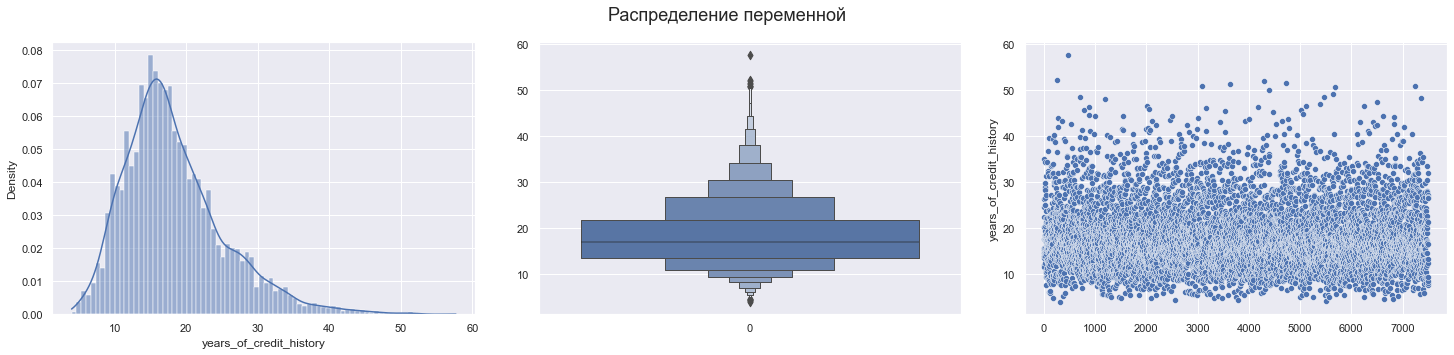

In [250]:
distribution_of_quantitative_variables(years_of_credit_history)

##### maximum_open_credit

In [251]:
maximum_open_credit = train_data_eda_num['maximum_open_credit']

Описательные статистики:
count         7500.00
mean        945153.73
std       16026216.67
min              0.00
25%         279229.50
50%         478159.00
75%         793501.50
max     1304726170.00
Name: maximum_open_credit, dtype: float64


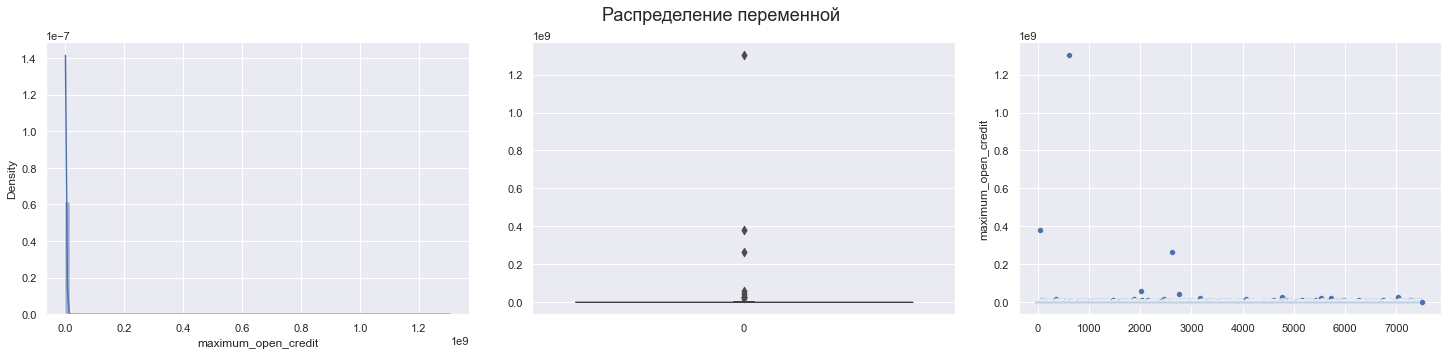

In [252]:
distribution_of_quantitative_variables(maximum_open_credit)

##### months_since_last_delinquent

In [253]:
months_since_last_delinquent = train_data_eda_num['months_since_last_delinquent']

Описательные статистики:
count   7491.00
mean      34.30
std       21.64
min        0.00
25%       16.00
50%       32.00
75%       50.00
max      118.00
Name: months_since_last_delinquent, dtype: float64


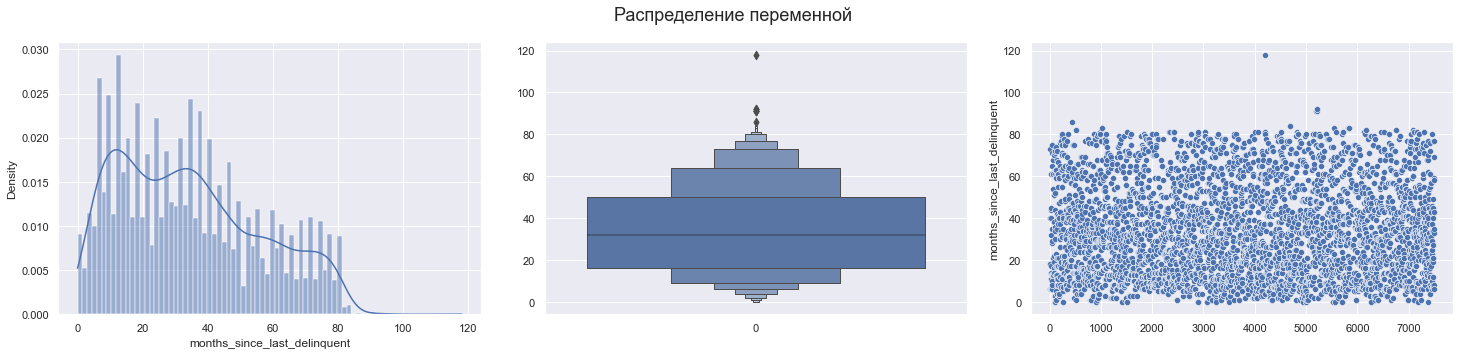

In [254]:
distribution_of_quantitative_variables(months_since_last_delinquent)

##### current_loan_amount

In [255]:
current_loan_amount = train_data_eda_num['current_loan_amount']
current_loan_amount

0      99999999.00
1        264968.00
2      99999999.00
3        121396.00
4        125840.00
           ...    
7495     129360.00
7496     444048.00
7497   99999999.00
7498     615274.00
7499      26928.00
Name: current_loan_amount, Length: 7500, dtype: float64

Описательные статистики:
count       7500.00
mean    11873177.45
std     31926122.97
min        11242.00
25%       180169.00
50%       309573.00
75%       519882.00
max     99999999.00
Name: current_loan_amount, dtype: float64


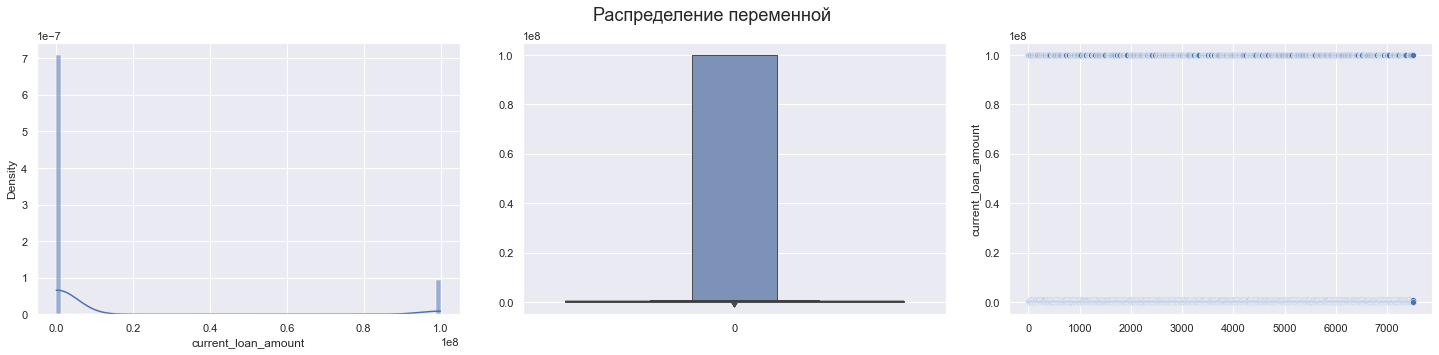

In [256]:
distribution_of_quantitative_variables(current_loan_amount)

##### current_credit_balance

In [257]:
current_credit_balance = train_data_eda_num['current_credit_balance']

Описательные статистики:
count      7500.00
mean     289833.24
std      317871.38
min           0.00
25%      114256.50
50%      209323.00
75%      360406.25
max     6506797.00
Name: current_credit_balance, dtype: float64


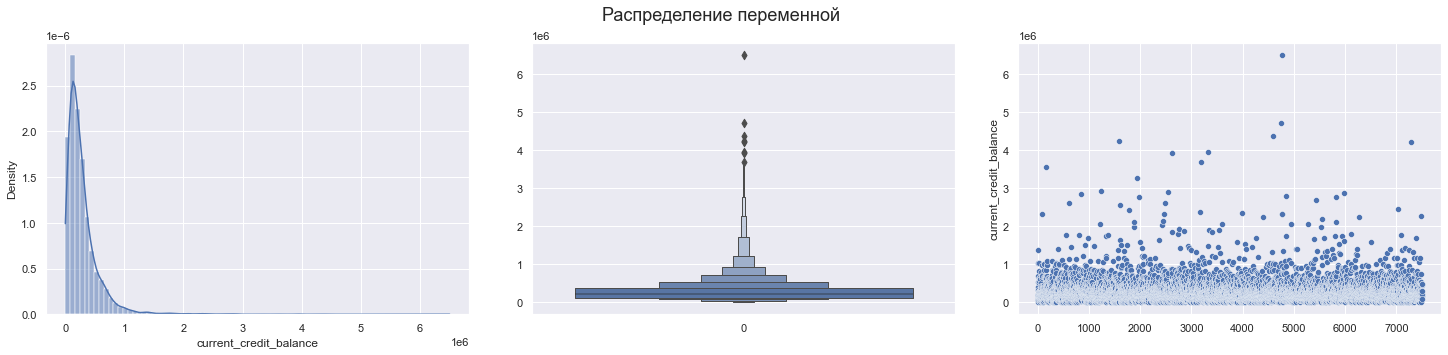

In [258]:
distribution_of_quantitative_variables(current_credit_balance)

##### monthly_debt

In [259]:
monthly_debt = train_data_eda_num['monthly_debt']

Описательные статистики:
count     7500.00
mean     18314.45
std      11926.76
min          0.00
25%      10067.50
50%      16076.50
75%      23818.00
max     136679.00
Name: monthly_debt, dtype: float64


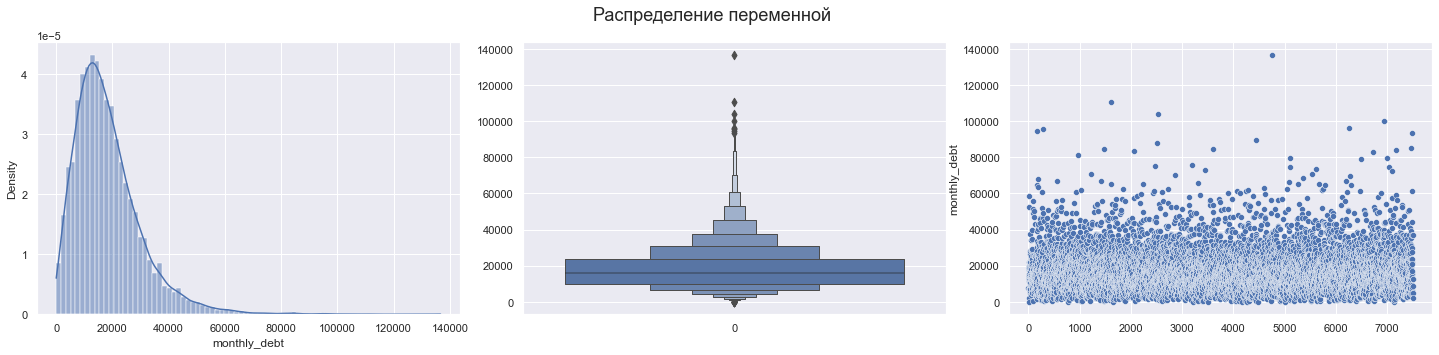

In [260]:
distribution_of_quantitative_variables(monthly_debt)

##### credit_score

In [261]:
credit_score = train_data_eda_num['credit_score']

Описательные статистики:
count   7500.00
mean    1063.88
std     1438.34
min      585.00
25%      718.00
50%      731.00
75%      740.00
max     7510.00
Name: credit_score, dtype: float64


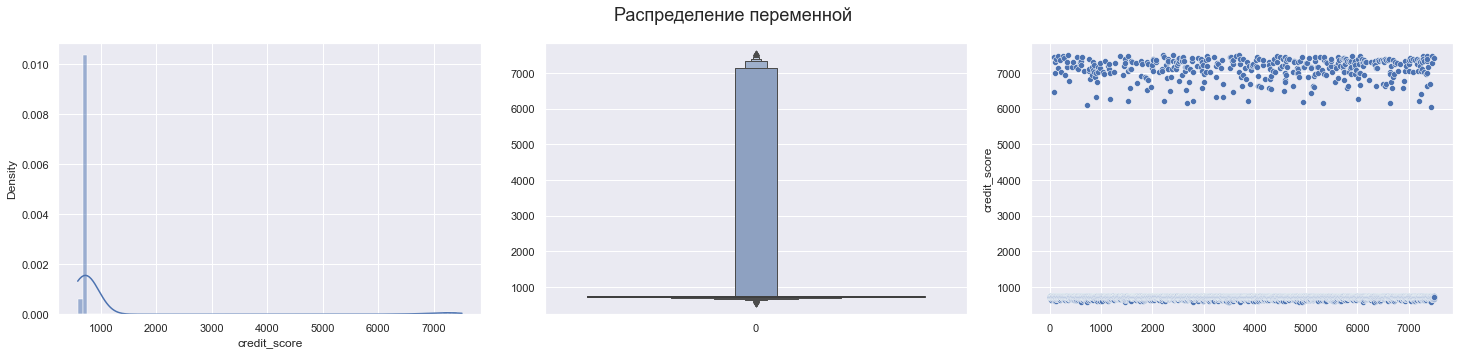

In [262]:
distribution_of_quantitative_variables(credit_score)

#### Исследуем распределение категориальных переменных

In [265]:
# Список переменных
train_data_eda_cat.columns.to_list()

['home_ownership',
 'years_in_current_job',
 'tax_liens',
 'number_of_credit_problems',
 'bankruptcies',
 'purpose',
 'term',
 'credit_default']

In [354]:
def displot_eda(data_for_eda):
    sns.displot(data = data_for_eda, kind='hist', shrink=0.5, orient="h").fig.set_size_inches(10,5)
    print("Описательные статистики:\n{}".format(data_for_eda.describe()))

In [355]:
home_ownership = train_data_eda_cat['home_ownership']

AttributeError: 'Rectangle' object has no property 'orient'

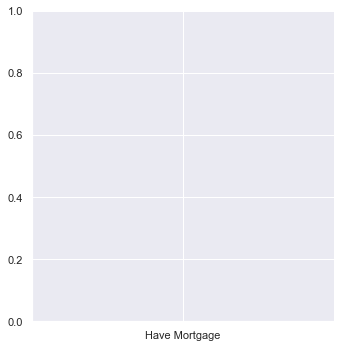

In [357]:
displot_eda(home_ownership)

In [270]:
# distribution_of_categorical_variables(home_ownership)

In [322]:
years_in_current_job = train_data_eda_cat['years_in_current_job']

In [359]:
years_in_current_job.unique().to_list()

['Unknown',
 '10+ years',
 '8 years',
 '6 years',
 '7 years',
 '5 years',
 '1 year',
 '< 1 year',
 '4 years',
 '3 years',
 '2 years',
 '9 years']

Описательные статистики:
count          7500
unique           12
top       10+ years
freq           2332
Name: years_in_current_job, dtype: object


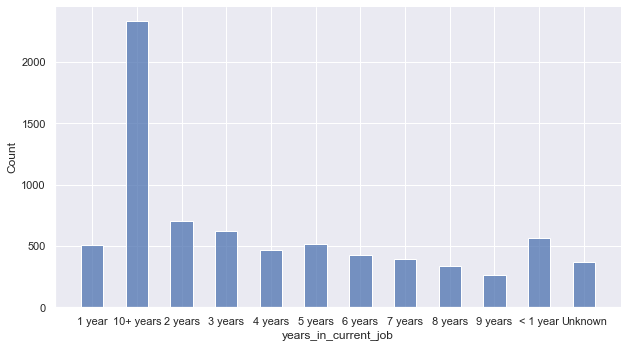

In [343]:
displot_eda(years_in_current_job)

In [330]:
# sns.catplot(data = years_in_current_job,kind="count")

In [331]:
# sns.countplot(data = years_in_current_job)

In [337]:
tax_liens = train_data_eda_cat['tax_liens']

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


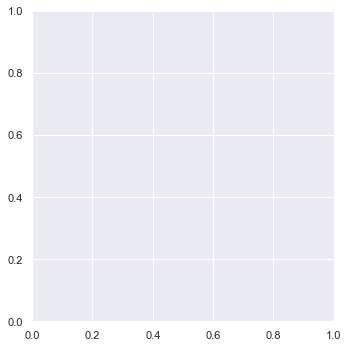

In [350]:
displot_eda(tax_liens)

In [344]:
number_of_credit_problems = train_data_eda_cat['number_of_credit_problems']

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


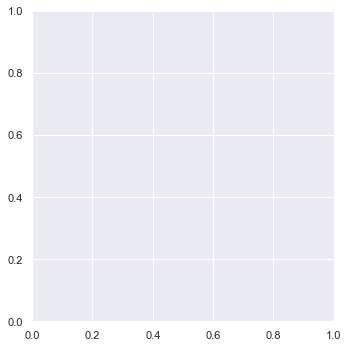

In [351]:
displot_eda(number_of_credit_problems)

In [345]:
bankruptcies = train_data_eda_cat['bankruptcies']

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


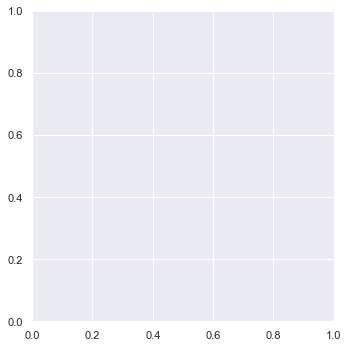

In [352]:
displot_eda(bankruptcies)

In [349]:
purpose = train_data_eda_cat['purpose']

Описательные статистики:
count                   7500
unique                    15
top       debt consolidation
freq                    5944
Name: purpose, dtype: object


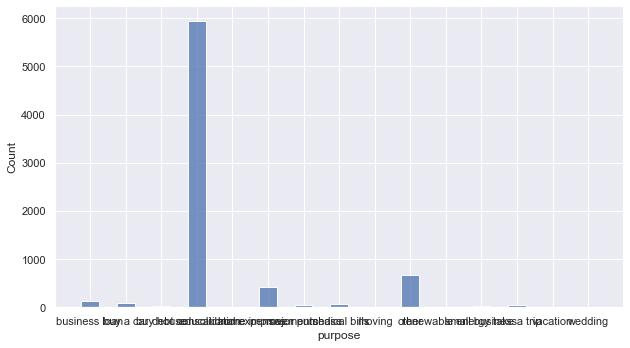

In [353]:
displot_eda(purpose)

In [347]:
term = train_data_eda_cat['term']

In [ ]:
displot_eda(years_in_current_job)

In [348]:
credit_default  = train_data_eda_cat['credit_default']

In [ ]:
displot_eda(years_in_current_job)

### _Outliers detection_

---

### _Exploring Relationships_

---

### _Correlation analysis_

---

### _Time Series Analysis_

---

### _Grouping Datasets_

---

<center>

# Section 2. Conclusions

<center>
    
# **STAGE 4. FEATURE ENGINEERING**



### _Imputation_

---

### _Handling Outliers_

---

### _Binning_

---

### _Log Transform_

---

### _One-Hot Encoding_

---

### _Grouping Operations_

---

### _Feature Split_

---

### _Scaling_

---

### _Extracting Date_

---

<center>
    
# **STAGE 5. TRAIN | TEST SPLIT**

<center>
    
# **STAGE 6. PREPARE FOR MACHINE LEARNING**

<center>
    
# **STAGE 7. PICK MODELS**

<center>
    
# **STAGE 8. MODEL SELECTION AND EVALUATING**

<center>
    
# **STAGE 9. MODEL TUNING**

<center>
    
# **STAGE 10. INTERPRETING THE MODEL RESULTS**